In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import ensemble
from matplotlib import style
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

style.use('fivethirtyeight')
%matplotlib inline

In [2]:
TRAIN_DATASET_PATH   = '../input/realestatepriceprediction/train.csv'
TEST_DATASET_PATH  = '../input/realestatepriceprediction/test.csv'

X_final = pd.read_csv(TEST_DATASET_PATH)
X = pd.read_csv(TRAIN_DATASET_PATH)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [3]:
train_data = pd.read_csv(TRAIN_DATASET_PATH)
train_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [4]:
X['HouseFloor'].sort_values().unique()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
X['Floor'].sort_values().unique()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
(X['Floor'] > X['HouseFloor']).sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

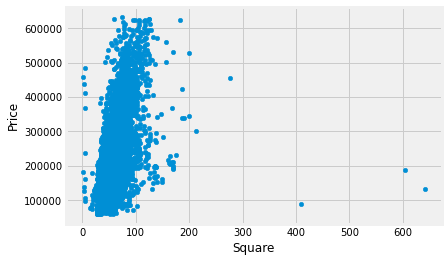

In [8]:
# 1 график площади
var = 'Square'
data = pd.concat([X['Price'], X[var]], axis=1)
data.plot.scatter(x=var, y='Price');

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

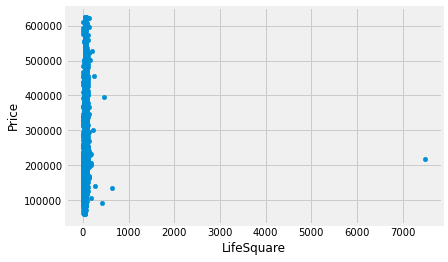

In [10]:
# 2 график жилой площади
var = 'LifeSquare'
data = pd.concat([X['Price'], X[var]], axis=1)
data.plot.scatter(x=var, y='Price');

In [11]:
X.select_dtypes

<bound method DataFrame.select_dtypes of          Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0     14038          35    2.0  47.981561   29.442751            6.0      7   
1     15053          41    3.0  65.683640   40.049543            8.0      7   
2      4765          53    2.0  44.947953   29.197612            0.0      8   
3      5809          58    2.0  53.352981   52.731512            9.0      8   
4     10783          99    1.0  39.649192   23.776169            7.0     11   
...     ...         ...    ...        ...         ...            ...    ...   
9995     77          32    2.0  50.401785   30.476203            5.0      6   
9996   6159          18    1.0  41.521546   20.539216            9.0     13   
9997   5123          27    1.0  47.939008         NaN            1.0     12   
9998   5400          75    2.0  43.602562   33.840147            8.0      1   
9999   6306         128    1.0  38.666645   21.157874            8.0      7   

      Hous

In [12]:
df = X.select_dtypes(include='float64')

In [13]:
# корреляция
df.corr()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Price
Rooms,1.000000,0.662893,0.131336,0.005123,-0.029302,-0.032347,0.042857,0.550291
Square,0.662893,1.000000,0.196129,0.008320,0.081505,-0.064479,-0.039748,0.520075
LifeSquare,0.131336,0.196129,1.000000,-0.001195,0.027442,-0.023629,-0.026867,0.081292
KitchenSquare,0.005123,0.008320,-0.001195,1.000000,0.000780,-0.005622,0.009472,0.028864
HouseFloor,-0.029302,0.081505,0.027442,0.000780,1.000000,-0.004362,-0.143973,0.088280
Ecology_1,-0.032347,-0.064479,-0.023629,-0.005622,-0.004362,1.000000,-0.043547,-0.058381
Healthcare_1,0.042857,-0.039748,-0.026867,0.009472,-0.143973,-0.043547,1.000000,0.138755
Price,0.550291,0.520075,0.081292,0.028864,0.088280,-0.058381,0.138755,1.000000


In [14]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [15]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [16]:
X = X.sort_values('Price')
X_final = X_final.sort_values('DistrictId')
X = X.fillna(method='pad')
X_final = X_final.fillna(method='pad')

In [17]:
y = X.Price
X.drop('Price', axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)

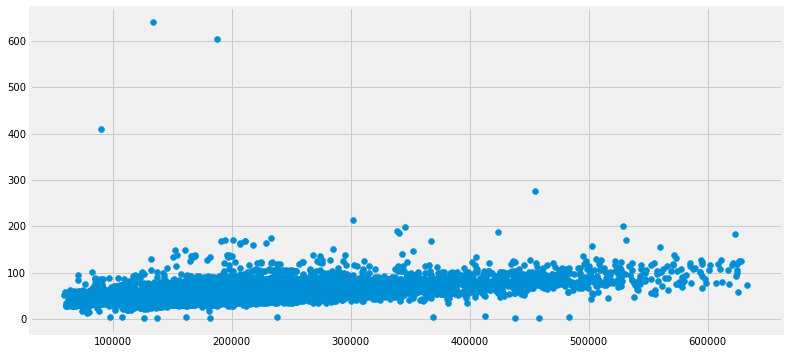

In [18]:
# 3 график
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

plt.scatter(y, X.Square)

In [19]:
X = pd.get_dummies(X)

In [20]:
# 1 модель и R2
model1 = RandomForestRegressor(n_estimators=300, max_depth=18, random_state=42, max_features=7)
cv_score = cross_val_score(model1, X, y, 
scoring='r2', 
cv=KFold(n_splits=5, shuffle=True, random_state=42))
mean = cv_score.mean()
std = cv_score.std()
print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.743 +- 0.015


In [21]:
# 2 модель и R2
model2 = ensemble.GradientBoostingRegressor(n_estimators=300, max_depth=6, min_samples_split=2,
learning_rate=0.1, loss='ls', random_state=42)
cv_score = cross_val_score(model2, X, y, 
scoring='r2',cv=KFold(n_splits=5, shuffle=True, random_state=42))
mean = cv_score.mean()
std = cv_score.std()
print('R2: {:.3f} +- {:.3f}'.format(mean, std))

R2: 0.748 +- 0.022


In [22]:
model = VotingRegressor([('model1',model1), ('model2',model2)])

In [23]:
model.fit(X, y)

VotingRegressor(estimators=[('model1',
                             RandomForestRegressor(max_depth=18, max_features=7,
                                                   n_estimators=300,
                                                   random_state=42)),
                            ('model2',
                             GradientBoostingRegressor(max_depth=6,
                                                       n_estimators=300,
                                                       random_state=42))])

In [24]:
# Предсказание 
X_test = pd.get_dummies(X_final)
X_test.drop("Id", axis=1, inplace=True)
X_final["Price"] = model.predict(X_test)
X_final.loc[:, ['Id', 'Price']].to_csv('predictionsVR.csv', index=False)
X_final.loc[:, ['Id', 'Price']].head(20)

,Id,Price
4561,4836,243553.116039
2231,6456,183360.282732
2897,11838,102509.287331
514,11567,307249.510099
2831,6607,142041.453228
4739,3260,169482.298958
3298,4834,213257.963216
2841,7319,147338.982192
4004,6675,215259.302648
4094,4637,442305.939008
